# Keras to Tensorflow Model

In [1]:
import keras
import tensorflow as tf
import coremltools
import numpy as np
np.random.seed(0)
import segmentation_models as sm
import sys
import os
sys.path.append("..")
from seg_net.keras_to_tensorflow import *
from seg_net.data import *

Using TensorFlow backend.
/home/avantariml/.local/lib/python3.5/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


## Set Model Architecture

In [3]:
INPUT_SHAPE = (512,512,3) #(528,528,3) (512,512,3) (768,768,3)
NUM_CLASS = 1
BACKBONE = 'mobilenetv2'
MODEL_NAME = 'Unet'
LOSS_METRICS = 'BCE_ACC_IOU'
MODEL_PATH = '../results/Models/Models'
ACTIVATION = 'sigmoid'

# Output protocol buffer model path
model_fname = '{0}_{1}_{2}_{3}_{4}_{5}'.format(BACKBONE,
                                              MODEL_NAME,
                                              LOSS_METRICS,
                                              NUM_CLASS,
                                              ACTIVATION,
                                              INPUT_SHAPE[0])
keras_filename = '{}.hdf5'.format(model_fname)
pb_filename = '{}.pb'.format(model_fname)
pb_q_filename = '{}_Q.pb'.format(model_fname)
mlmodel_filename = '{}.mlmodel'.format(model_fname)
tflite_filename = '{}.tflite'.format(model_fname)

## Build and Load Model

In [4]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet', 
                  classes=NUM_CLASS,
                  activation=ACTIVATION,
                  input_shape = INPUT_SHAPE)

Instructions for updating:
Colocations handled automatically by placer.


/home/avantariml/.local/lib/python3.5/site-packages/segmentation_models/backbones/mobilenetv2.py:273: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'
Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.load_weights(os.path.join(MODEL_PATH,keras_filename))

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 513, 513, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 256, 256, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 256, 256, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

## save keras model as tf .pb and as CoreML .mlmodel

In [5]:
input_node_names = [node.op.name for node in model.inputs]
print(input_node_names)

['input_1']


In [6]:
# output_names
output_node_names = [node.op.name for node in model.outputs]
print(output_node_names)

['sigmoid/Sigmoid']


### Freezing the model to .pb

In [7]:
from keras import backend as K
#frozen_graph = freeze_session(K.get_session(),output_names=[out.op.name for out in model.outputs])
frozen_graph =  freeze_keras(K.get_session(), model, quantize=False)
#frozen_graph_Q =  freeze_keras(K.get_session(), model, quantize=True)
tf.train.write_graph(frozen_graph, MODEL_PATH, pb_filename, as_text=False)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants


Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants


Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


INFO:tensorflow:Froze 312 variables.


INFO:tensorflow:Froze 312 variables.


INFO:tensorflow:Converted 312 variables to const ops.


INFO:tensorflow:Converted 312 variables to const ops.


'../results/Models/Models/mobilenetv2_Unet_BCE_ACC_IOU_1_sigmoid_512.pb'

In [8]:
# print all operation names 
#print('\n===== ouptut operation names =====\n')
#for op in sess.graph.get_operations():
#    print(op)   
for names in [n.name for n in tf.get_default_graph().as_graph_def().node]:
    print(names)

input_1
Conv1_pad/Pad/paddings
Conv1_pad/Pad
Conv1/random_uniform/shape
Conv1/random_uniform/min
Conv1/random_uniform/max
Conv1/random_uniform/RandomUniform
Conv1/random_uniform/sub
Conv1/random_uniform/mul
Conv1/random_uniform
Conv1/kernel
Conv1/kernel/Assign
Conv1/kernel/read
Conv1/convolution/dilation_rate
Conv1/convolution
bn_Conv1/Const
bn_Conv1/gamma
bn_Conv1/gamma/Assign
bn_Conv1/gamma/read
bn_Conv1/Const_1
bn_Conv1/beta
bn_Conv1/beta/Assign
bn_Conv1/beta/read
bn_Conv1/Const_2
bn_Conv1/moving_mean
bn_Conv1/moving_mean/Assign
bn_Conv1/moving_mean/read
bn_Conv1/Const_3
bn_Conv1/moving_variance
bn_Conv1/moving_variance/Assign
bn_Conv1/moving_variance/read
bn_Conv1/IsVariableInitialized
bn_Conv1/IsVariableInitialized_1
bn_Conv1/IsVariableInitialized_2
bn_Conv1/IsVariableInitialized_3
bn_Conv1/IsVariableInitialized_4
bn_Conv1/init
bn_Conv1/Const_4
bn_Conv1/Const_5
bn_Conv1/FusedBatchNorm
bn_Conv1/Shape
bn_Conv1/strided_slice/stack
bn_Conv1/strided_slice/stack_1
bn_Conv1/strided_slice

block_11_depthwise_BN/moving_mean/local_step
block_11_depthwise_BN/moving_mean/local_step/Assign
block_11_depthwise_BN/moving_mean/local_step/read
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/sub
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/mul
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/block_11_depthwise_BN/moving_mean
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/AssignAdd/value
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/AssignAdd
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/read
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/sub_1/x
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/sub_1
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/read_1
block_11_depthwise_BN/AssignMovingAvg/block_11_depthwise_BN/moving_mean/Pow
block_11_depthwise_BN/AssignMovingA

decoder_stage4_bn1/moving_variance/biased
decoder_stage4_bn1/moving_variance/biased/Assign
decoder_stage4_bn1/moving_variance/biased/read
decoder_stage4_bn1/moving_variance/local_step/Initializer/zeros
decoder_stage4_bn1/moving_variance/local_step
decoder_stage4_bn1/moving_variance/local_step/Assign
decoder_stage4_bn1/moving_variance/local_step/read
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/sub
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/mul
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/decoder_stage4_bn1/moving_variance
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/AssignAdd/value
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/AssignAdd
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/read
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving_variance/sub_1/x
decoder_stage4_bn1/AssignMovingAvg_1/decoder_stage4_bn1/moving

In [9]:
# Converting a tf.keras model.
converter = tf.lite.TFLiteConverter.from_session(K.get_session(), model.inputs, model.outputs)
tflite_model = converter.convert()
with open(os.path.join(MODEL_PATH,tflite_filename), "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Froze 312 variables.


INFO:tensorflow:Froze 312 variables.


INFO:tensorflow:Converted 312 variables to const ops.


INFO:tensorflow:Converted 312 variables to const ops.


### Freezing the model to .mlmodel

In [10]:
coreml_model = coremltools.converters.keras.convert(model,
                                                    input_names=input_node_names,
                                                    image_input_names=input_node_names,
                                                    output_names=output_node_names,
                                                    image_scale=1/255.0
                                                   )

0 : input_1, <keras.engine.input_layer.InputLayer object at 0x7f4dac616dd8>
1 : Conv1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x7f4dac616fd0>
2 : Conv1, <keras.layers.convolutional.Conv2D object at 0x7f4dac616f98>
3 : bn_Conv1, <keras.layers.normalization.BatchNormalization object at 0x7f4d03289710>
4 : Conv1_relu, <keras.layers.advanced_activations.ReLU object at 0x7f4d03289d30>
5 : expanded_conv_depthwise, <keras.layers.convolutional.DepthwiseConv2D object at 0x7f4d02825a58>
6 : expanded_conv_depthwise_BN, <keras.layers.normalization.BatchNormalization object at 0x7f4d03289eb8>
7 : expanded_conv_depthwise_relu, <keras.layers.advanced_activations.ReLU object at 0x7f4d00750e48>
8 : expanded_conv_project, <keras.layers.convolutional.Conv2D object at 0x7f4d006bcd30>
9 : expanded_conv_project_BN, <keras.layers.normalization.BatchNormalization object at 0x7f4d00720c88>
10 : block_1_expand, <keras.layers.convolutional.Conv2D object at 0x7f4d006dec50>
11 : block_1_expand_BN,

95 : block_10_depthwise_BN, <keras.layers.normalization.BatchNormalization object at 0x7f4cc4194780>
96 : block_10_depthwise_relu, <keras.layers.advanced_activations.ReLU object at 0x7f4cc40c2ef0>
97 : block_10_project, <keras.layers.convolutional.Conv2D object at 0x7f4cc40b2c50>
98 : block_10_project_BN, <keras.layers.normalization.BatchNormalization object at 0x7f4cc4094b70>
99 : block_11_expand, <keras.layers.convolutional.Conv2D object at 0x7f4cc4050b70>
100 : block_11_expand_BN, <keras.layers.normalization.BatchNormalization object at 0x7f4c9c6c2f98>
101 : block_11_expand_relu, <keras.layers.advanced_activations.ReLU object at 0x7f4c9c774940>
102 : block_11_depthwise, <keras.layers.convolutional.DepthwiseConv2D object at 0x7f4c9c6a07f0>
103 : block_11_depthwise_BN, <keras.layers.normalization.BatchNormalization object at 0x7f4c9c683f28>
104 : block_11_depthwise_relu, <keras.layers.advanced_activations.ReLU object at 0x7f4c9c5dddd8>
105 : block_11_project, <keras.layers.convolution

189 : decoder_stage4_bn1, <keras.layers.normalization.BatchNormalization object at 0x7f4c42c3b978>
190 : decoder_stage4_relu1, <keras.layers.core.Activation object at 0x7f4c42bd7400>
191 : decoder_stage4_conv2, <keras.layers.convolutional.Conv2D object at 0x7f4c42c3bfd0>
192 : decoder_stage4_bn2, <keras.layers.normalization.BatchNormalization object at 0x7f4c42b440b8>
193 : decoder_stage4_relu2, <keras.layers.core.Activation object at 0x7f4c42ba6780>
194 : final_conv, <keras.layers.convolutional.Conv2D object at 0x7f4c42a86978>
195 : sigmoid, <keras.layers.core.Activation object at 0x7f4c42aeeeb8>


In [11]:
spec = coreml_model.get_spec()
print(spec.description)

input {
  name: "input_1"
  type {
    imageType {
      width: 512
      height: 512
      colorSpace: RGB
    }
  }
}
output {
  name: "sigmoid/Sigmoid"
  type {
    multiArrayType {
      shape: 1
      shape: 512
      shape: 512
      dataType: DOUBLE
    }
  }
}



In [12]:
coreml_model.save(os.path.join(MODEL_PATH, mlmodel_filename))

## load & inference the model

In [13]:
from tensorflow.python.platform import gfile
sess = tf.Session()

In [16]:
# load model from pb file
with gfile.FastGFile(os.path.join(MODEL_PATH,pb_filename),'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    sess.graph.as_default()
    g_in = tf.import_graph_def(graph_def)

In [17]:
# Load Test Images
import matplotlib.pyplot as plt
%matplotlib inline
import random
import skimage
import glob
import os
import cv2
test_path = "../data/raw/test"
fnames = sorted(glob.glob(os.path.join(test_path,"*.jpg")))
images = []
outs = []
for f in fnames:
    img = skimage.io.imread(f)
    images.append(img)

CPU times: user 225 ms, sys: 160 ms, total: 385 ms
Wall time: 226 ms


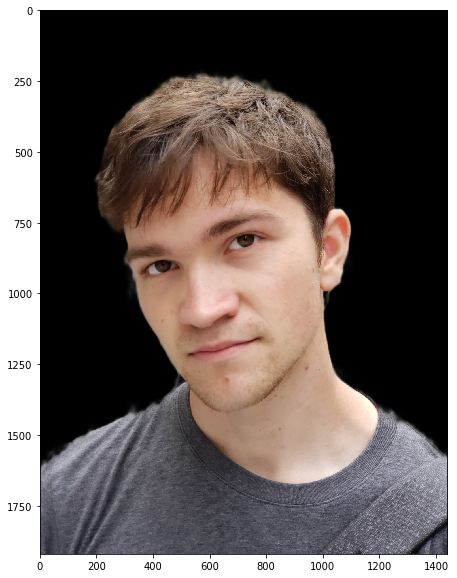

In [34]:
%%time
# Choose a random image and preprocess for inference.
i = random.choice(range(0,len(images)))
img  = images[i]
img_ = np.expand_dims(cv2.resize(img,INPUT_SHAPE[:2]),axis=0)
img_ = preprocess_input(img_, imgNorm="divide")
# inference by the model (op name must comes with :0 to specify the index of its output)
tensor_output = sess.graph.get_tensor_by_name('import/sigmoid/Sigmoid:0')
tensor_input = sess.graph.get_tensor_by_name('import/input_1:0') # mobilnerv3 -> input_1, resnet50 -> data
output = sess.run(tensor_output, {tensor_input: img_})
# Resize and Apply Mask on input image.
mask = skimage.transform.resize(np.squeeze(output),img.shape[:2],preserve_range=True)
im = cv2.multiply(np.repeat(np.expand_dims(mask,axis=-1),3,axis=2).astype(float), img.astype(float))/255
plt.rcParams['figure.figsize'] = [10,10]
plt.imshow(im)

In [41]:
sess.close()